## Лабораторная работа №0 "О росте больных ковидом"

#### Выполнил студент группы МПИ-241 Нехаенко Владимир

#### Вариант 9. С ноября 2020 по февраль 2021

In [2]:
import math
from datetime import date
from itertools import product

import numpy as np
import pandas as pd
from dateutil.relativedelta import relativedelta
from matplotlib import pyplot as plt
from scipy.stats import norm, stats

#### Подготовка данных

In [4]:
start_date = date(2020, 11, 1)
end_date = start_date + relativedelta(months=3)

dataframe = pd.read_csv('datasets/covid-data.csv', ).sort_values('date', ascending=True)
dataframe = dataframe[dataframe.apply(lambda row: start_date <= date.fromisoformat(row['date']) <= end_date, axis=1)]
dataframe

,date,death,deathIncrease,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCumulative,onVentilatorCurrently,positive,positiveIncrease,states,totalTestResults,totalTestResultsIncrease
126,2020-11-01,223035.0,410,24457.0,9665.0,1166,47615.0,366110.0,41504027.0,228603,2797.0,2553.0,9207091.0,141974,56,151506495,1160138
125,2020-11-02,223510.0,475,24560.0,9957.0,1399,48750.0,367509.0,41787471.0,283444,2809.0,2633.0,9290545.0,83454,56,152745393,1238898
124,2020-11-03,225027.0,1517,24796.0,10538.0,3135,50509.0,370644.0,42043319.0,255848,2833.0,2734.0,9410494.0,119949,56,154014545,1269152
123,2020-11-04,226158.0,1131,25041.0,10892.0,3107,52166.0,373751.0,42245917.0,202598,2853.0,2832.0,9516490.0,105996,56,155332996,1318451
122,2020-11-05,227312.0,1154,25276.0,11050.0,2553,53380.0,376304.0,42548344.0,302427,2872.0,2876.0,9635513.0,119023,56,156894058,1561062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,2021-01-28,423645.0,4011,41588.0,20113.0,3500,104303.0,696547.0,66430423.0,269667,4000.0,6642.0,25541644.0,157306,56,306066679,1936761
37,2021-01-29,427148.0,3503,41758.0,19609.0,2835,101003.0,699382.0,66714591.0,284168,4011.0,6483.0,25708755.0,167111,56,308021780,1955101
36,2021-01-30,430130.0,2982,41872.0,19130.0,3147,97561.0,702529.0,66946890.0,232299,4016.0,6329.0,25857579.0,148824,56,310161359,2139579
35,2021-01-31,432189.0,2059,41934.0,18968.0,2171,95013.0,704700.0,67171483.0,224593,4019.0,6291.0,25976946.0,119367,56,311887083,1725724


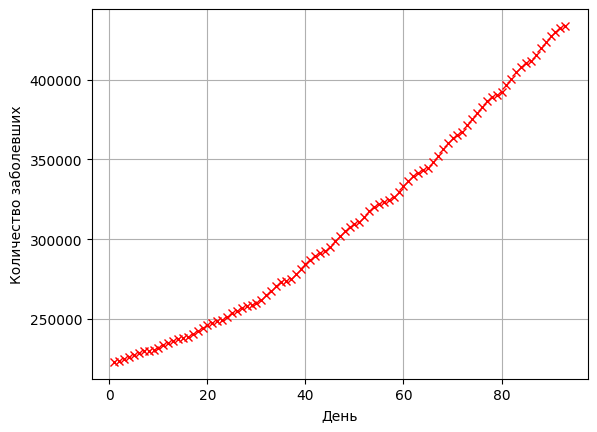

In [7]:
x = dataframe['death'].to_numpy()
t = np.array(range(1, len(x)+1))

plt.xlabel("День")
plt.ylabel("Количество заболевших")
plt.grid()
plt.plot(t, x, "rx")